### Load the Dataset:

In [19]:
import pandas as pd

In [20]:
dataset_file = "soc-Epinions1.txt"

In [21]:
# Read the dataset file into a Pandas DataFrame, skipping comment lines
df = pd.read_csv(dataset_file, sep='\t', comment='#', header=None, names=['FromNodeId', 'ToNodeId'])

In [22]:
# Display the first few rows of the DataFrame to verify the data
print(df.head())

   FromNodeId  ToNodeId
0           0         4
1           0         5
2           0         7
3           0         8
4           0         9


In [23]:
print(df.tail())

        FromNodeId  ToNodeId
508832       75884      1699
508833       75885      7900
508834       75885     16086
508835       75886     51414
508836       75887     52098


In [24]:
import networkx as nx

In [25]:
# Create an empty directed graph
G = nx.DiGraph()

In [26]:
# Add edges from the Pandas DataFrame
for index, row in df.iterrows():
    from_node = row['FromNodeId']
    to_node = row['ToNodeId']
    G.add_edge(from_node, to_node)

#### Calculate Node Degrees:

In [27]:
# Calculate in-degrees and out-degrees of nodes
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

In [28]:
print("In-degree of node 0:", in_degrees.get(0, 0))
print("Out-degree of node 0:", out_degrees.get(0, 0))

In-degree of node 0: 636
Out-degree of node 0: 139


#### CELF (Cost-Effective Lazy Forward) Algorithm:

#### Define Seed Set Sizes (k):

In [29]:
# Define a range of seed set sizes (k values)
seed_set_sizes = [10, 20, 30, 40, 50, 60]

#### Implement CELF and CELF++ Algorithms:

In [30]:
# Define your CELF algorithm here
def celf_algorithm(graph, k):
    seed_set = set()
    marginal_gains = {}

    for i in range(k):
        max_node = None
        max_gain = 0.0

        for node in graph.nodes():
            if node not in seed_set:
                temp_seed_set = seed_set.union({node})
                current_influence = calculate_influence(graph, temp_seed_set)

                if current_influence is not None and current_influence > max_gain:
                    max_gain = current_influence
                    max_node = node

        if max_node is not None:
            seed_set.add(max_node)
            marginal_gains[max_node] = max_gain

    return seed_set

def calculate_influence(graph, seed_set):
    # Implement influence propagation simulation (e.g., IC or LT model)
    # Return the total influence achieved by the seed set
    pass


In [31]:
# Define CELF++ algorithm here
def celf_plusplus_algorithm(graph, k):
    seed_set = set()
    marginal_gains = {}

    for i in range(k):
        max_node = None
        max_gain = 0.0

        for node in graph.nodes():
            if node not in seed_set:
                temp_seed_set = seed_set.union({node})
                current_gain = calculate_marginal_gain(graph, temp_seed_set, marginal_gains)

                if current_gain is not None and current_gain > max_gain:
                    max_gain = current_gain
                    max_node = node

        if max_node is not None:
            seed_set.add(max_node)
            marginal_gains[max_node] = max_gain

    return seed_set

def calculate_marginal_gain(graph, seed_set, marginal_gains):
    max_node = None
    max_gain = 0.0

    for node in seed_set:
        temp_seed_set = seed_set.difference({node})
        if node in marginal_gains:
            current_gain = marginal_gains[node]
        else:
            current_gain = calculate_influence(graph, temp_seed_set)
            marginal_gains[node] = current_gain

        if current_gain is not None and current_gain > max_gain:
            max_gain = current_gain
            max_node = node

    return max_gain if max_node is not None else 0.0  # Return 0.0 if max_node is None


#### Measure Runtimes:

In [32]:
import time
import matplotlib.pyplot as plt

In [33]:
# Dictionary to store runtimes for CELF and CELF++ for each seed set size
runtime_data = {"CELF": [], "CELF++": []}

In [34]:
# Perform experiments for each seed set size
for k in seed_set_sizes:
    # Measure runtime for CELF
    start_time = time.time()
    celf_seed_set = celf_algorithm(G.copy(), k) 
    end_time = time.time()
    celf_runtime = end_time - start_time
    runtime_data["CELF"].append(celf_runtime)

    # Measure runtime for CELF++
    start_time = time.time()
    celf_plusplus_seed_set = celf_plusplus_algorithm(G.copy(), k) 
    end_time = time.time()
    celf_plusplus_runtime = end_time - start_time
    runtime_data["CELF++"].append(celf_plusplus_runtime)

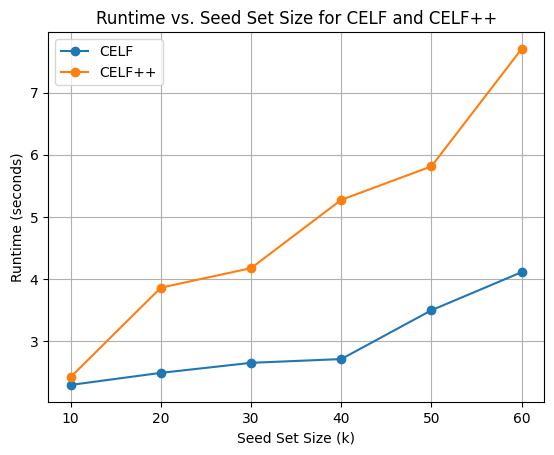

In [35]:
# Create separate plots for CELF and CELF++
for algorithm, runtimes in runtime_data.items():
    plt.plot(seed_set_sizes, runtimes, marker='o', label=algorithm)

plt.xlabel('Seed Set Size (k)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Seed Set Size for CELF and CELF++')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
import psutil

In [39]:
# Initialize lists to store memory usage for CELF and CELF++
celf_memory_usage = []
celf_plusplus_memory_usage = []

In [40]:
# Run the algorithms and measure memory usage for each seed set size
for k in seed_set_sizes:
    # Run CELF algorithm and measure memory usage
    memory_before_celf = psutil.virtual_memory().used
    celf_algorithm(G, k)  # Replace with your CELF algorithm
    memory_after_celf = psutil.virtual_memory().used
    memory_usage_celf = memory_after_celf - memory_before_celf
    celf_memory_usage.append(memory_usage_celf)

    # Run CELF++ algorithm and measure memory usage
    memory_before_celf_plusplus = psutil.virtual_memory().used
    celf_plusplus_algorithm(G, k)  # Replace with your CELF++ algorithm
    memory_after_celf_plusplus = psutil.virtual_memory().used
    memory_usage_celf_plusplus = memory_after_celf_plusplus - memory_before_celf_plusplus
    celf_plusplus_memory_usage.append(memory_usage_celf_plusplus)

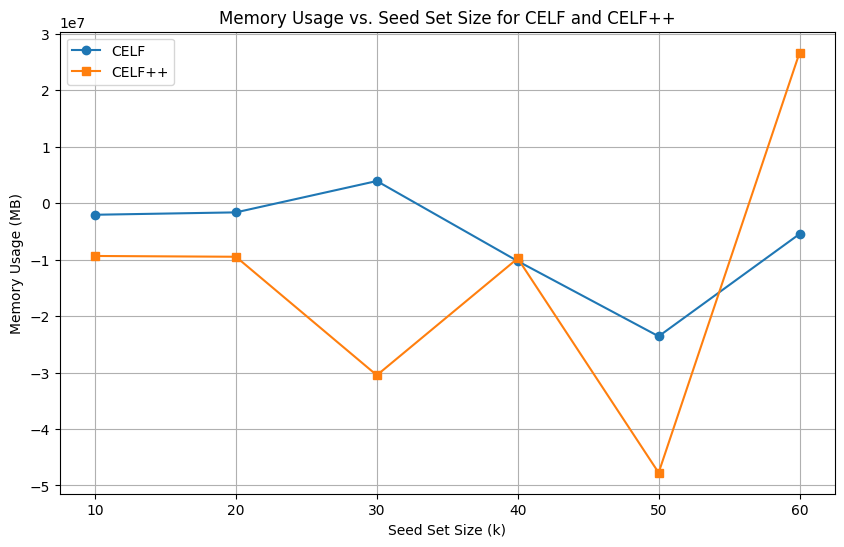

In [41]:
# Create a memory usage vs. seed set size graph
plt.figure(figsize=(10, 6))
plt.plot(seed_set_sizes, celf_memory_usage, marker='o', label='CELF')
plt.plot(seed_set_sizes, celf_plusplus_memory_usage, marker='s', label='CELF++')
plt.xlabel('Seed Set Size (k)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs. Seed Set Size for CELF and CELF++')
plt.legend()
plt.grid(True)
plt.show()